Could not display image content/memes/1.png: name 'Image' is not defined
Could not display image content/memes/2.png: name 'Image' is not defined
Could not display image content/memes/3.png: name 'Image' is not defined
Could not display image content/memes/4.png: name 'Image' is not defined
Could not display image content/memes/5.png: name 'Image' is not defined


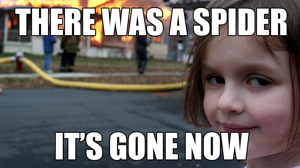

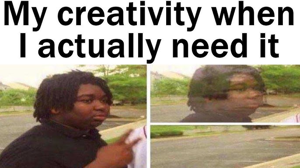

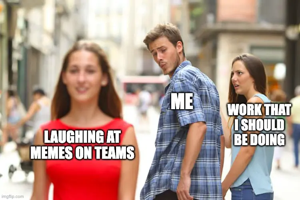

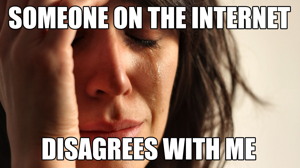

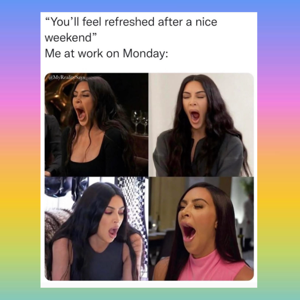

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.6 MB/s eta 0:00:00


100%|███████████████████████████████████████| 338M/338M [00:07<00:00, 45.7MiB/s]


Found 5 images.


In [1]:
# @title Get memes
import os
import requests

# Create directory
save_dir = "content/memes"
os.makedirs(save_dir, exist_ok=True)

!pip install -U gdown
!gdown --folder https://drive.google.com/drive/folders/1TgfuJiKDfqCKO2lkoV9u1Tc6A2Hu-Jz1 -O content/memes --quiet

folder_path = "content/memes"

# Display each image
for filename in sorted(os.listdir(folder_path)):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.webp')):
        img_path = os.path.join(folder_path, filename)
        try:
            img = Image.open(img_path)
            display(img.resize((300, int(300 * img.height / img.width))))
        except Exception as e:
            print(f"Could not display image {img_path}: {e}")

# @title Display All Memes
from IPython.display import display
from PIL import Image
for filename in os.listdir('content/memes'):
  if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.webp')):
    img_path = os.path.join('content/memes', filename)
    try:
      img = Image.open(img_path)
      display(img.resize((300, int(300 * img.height / img.width))))
    except Exception as e:
      print(f"Could not display image {img_path}: {e}")


!pip install -q ftfy regex tqdm
!pip install -q git+https://github.com/openai/CLIP.git
!pip install -q torch torchvision

import clip
import torch
from PIL import Image

import clip  # ✅ Import clip

# 2. Load CLIP and preprocess
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Folder where memes are stored
meme_dir = "/content/content/memes"

# Get all image file paths
valid_exts = (".png", ".jpg", ".jpeg", ".webp")
image_paths = [
    os.path.join(meme_dir, fname)
    for fname in os.listdir(meme_dir)
    if fname.lower().endswith(valid_exts)
]

print(f"Found {len(image_paths)} images.")

# Encode meme images with CLIP
image_features = []
for path in image_paths:
    try:
        image = preprocess(Image.open(path).convert("RGB")).unsqueeze(0).to(device)
        with torch.no_grad():
            image_feature = model.encode_image(image)
            image_feature /= image_feature.norm(dim=-1, keepdim=True)
            image_features.append(image_feature[0])
    except Exception as e:
        print(f"Error processing {path}: {e}")

# Stack all features into a single tensor
image_features = torch.stack(image_features)


# Function to Implement

In [2]:
# 4. Define search function
def search_images(query, top_k=5):
    with torch.no_grad():
        # Encode query
        text = clip.tokenize([query]).to(device)
        text_features = model.encode_text(text)
        text_features /= text_features.norm(dim=-1, keepdim=True)

        # Compute cosine similarities
        similarities = (image_features @ text_features.T).squeeze(1)
        best_indices = similarities.topk(top_k).indices

        # Display top result
        print(f"\nTop {top_k} results for: \"{query}\"")
        for i, idx in enumerate(best_indices):
            path = image_paths[idx]
            print(f"{i+1}: {path}")
            display(Image.open(path))

        return image_paths[best_indices[0]]

# Eval


Top 5 results for: "vanishing boy"
1: /content/content/memes/4.png


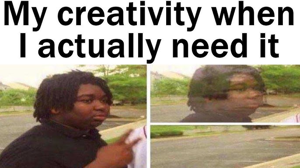

2: /content/content/memes/1.png


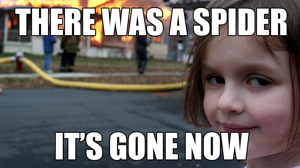

3: /content/content/memes/3.png


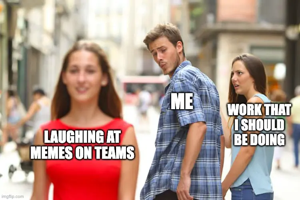

4: /content/content/memes/2.png


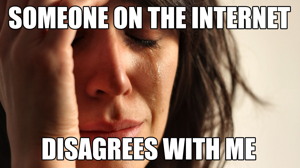

5: /content/content/memes/5.png


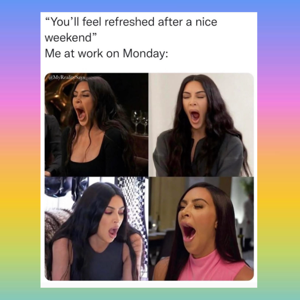

Search Results: /content/content/memes/4.png


In [5]:
# @title Search Memes
query = "vanishing boy" # @param {"type":"string","placeholder":"girl crying"}
results = search_images(query)
print("Search Results:", results)